# Supervised Learning

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml, fetch_mldata
import matplotlib.pyplot as plt
import os

In [7]:
# Install MNIST dataset
data_path = os.path.join(os.path.dirname(os.getcwd()), 'datasets')
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home=data_path)
print('data:', X.shape, ',', 'labels:', y.shape)

data: (70000, 784) , labels: (70000,)


## Data exploration

classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
classes counts: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]
X_imgs: (70000, 28, 28)


Text(0.5, 1.0, '1')

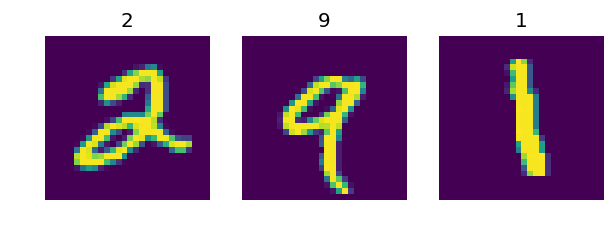

In [8]:
# Extract unique labels
unique_labels, counts = np.unique(y, return_counts=True)
num_classes = len(unique_labels)
print('classes:', unique_labels)
print('classes counts:', counts)

# Reshape to image
X_imgs = X.reshape(-1,28,28)
print('X_imgs:', X_imgs.shape)

# Random indices
idx1, idx2, idx3 = np.random.randint(0, num_classes, 3)

# Visualize
fig, ax = plt.subplots(1, 3, dpi=120)
ax[0].imshow(X_imgs[idx1]); ax[1].imshow(X_imgs[idx2]); ax[2].imshow(X_imgs[idx3]);
ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off');
ax[0].set_title(str(y[idx1])); ax[1].set_title(str(y[idx2])); ax[2].set_title(str(y[idx3]))

## Nearest neighbors classification

### Train-test split

In [10]:
# Choose a desired number of samples to extract ---------------------
n_train_pc = 20 # number of train samples per class
n_test_pc = 1 # number of test samples per class

n_train = n_train_pc * num_classes
n_test = n_test_pc * num_classes

# Initialize some variables -----------------------------------------
train_data = np.zeros((num_classes,n_train_pc,784))
train_labels = np.zeros((num_classes,n_train_pc))

test_data = np.zeros((num_classes,n_test_pc,784))
test_labels = np.zeros((num_classes,n_test_pc))

# Extract balanced data ---------------------------------------------
for l_idx, l in enumerate(unique_labels):
    idxs = np.squeeze(np.argwhere(y == l)) # where is the current label located in the data?
    idxs = np.random.choice(idxs, n_train_pc + n_test_pc, replace=False) # get random samples for the current label
    
    train_data[l_idx] = X[idxs[:n_train_pc]]
    train_labels[l_idx] = y[idxs[:n_train_pc]]
    
    test_data[l_idx] = X[idxs[n_train_pc:]]
    test_labels[l_idx] = y[idxs[n_train_pc:]]
    
# Ravel train data --------------------------------------------------
train_data = train_data.reshape(-1,784)
train_labels = np.ravel(train_labels).astype(np.int)

# Ravel test data ---------------------------------------------------
test_data = test_data.reshape(-1,784)
test_labels = np.ravel(test_labels).astype(np.int)

# Shuffle train data ------------------------------------------------
train_idxs = np.arange(len(train_data))
_ = np.random.shuffle(train_idxs)

train_data = train_data[train_idxs]
train_labels = train_labels[train_idxs]

# Shuffle test data -------------------------------------------------
test_idxs = np.arange(len(test_data))
_ = np.random.shuffle(test_idxs)

test_data = test_data[test_idxs]
test_labels = test_labels[test_idxs]

 # Printing ---------------------------------------------------------
print('train data:', train_data.shape, ',', 'train labels:', train_labels.shape)
print('test data:', test_data.shape, ',', 'test labels:', test_labels.shape)

train data: (200, 784) , train labels: (200,)
test data: (10, 784) , test labels: (10,)


### k-NN classification

In [38]:
# Euclidean norm (L2 norm) -----------------------------------------------------------
squared_diff = (test_data[:,np.newaxis,:] - train_data[np.newaxis, ...]) ** 2
sum_squared_diff = np.sum(squared_diff, axis=-1)
euclidean_distance = np.sqrt(sum_squared_diff)

print('sqaured_diff:', squared_diff.shape, ',', 'sum_squared_diff:', sum_squared_diff.shape, ',',     
      'euclidean_distance:', euclidean_distance.shape)

# Sort the distances and get the first k closest ones --------------------------------
k = 5 # number of votes
sort_idxs = np.argsort(euclidean_distance, axis=-1)
voting_idxs = sort_idxs[:,:k]

print('sort_idxs:', sort_idxs.shape, ',', 'voting_idxs:', voting_idxs.shape)
print('---------------------------------------------------------')

# Get the winning labels -------------------------------------------------------------
k_predicted_labels = train_labels[voting_idxs]
print('\ntest_labels:\n', test_labels)
print('\nk_predicted_labels:\n', k_predicted_labels, ', shape:', k_predicted_labels.shape)
print('---------------------------------------------------------')

# Start voting ----------------------------------------------------------------------
votes = np.zeros((n_test,num_classes))
test_sample_idxs = np.arange(n_test).reshape(-1,1) # Broadcasting the idxs
_ = np.add.at(votes, (test_sample_idxs, k_predicted_labels), 1)
print('\nvotes:\n', votes, '\n')
print('---------------------------------------------------------')

# Get final predictions -------------------------------------------------------------
predicted_labels = np.argmax(votes, axis=1)
print('predicted_labels:', predicted_labels, '\noriginal_labels: ', test_labels)

sqaured_diff: (10, 200, 784) , sum_squared_diff: (10, 200) , euclidean_distance: (10, 200)
sort_idxs: (10, 200) , voting_idxs: (10, 5)
---------------------------------------------------------

test_labels:
 [0 2 8 5 7 6 3 4 9 1]

k_predicted_labels:
 [[0 0 0 0 0]
 [8 2 6 2 8]
 [8 8 1 1 1]
 [5 3 5 5 8]
 [7 7 9 7 9]
 [6 6 4 4 6]
 [3 5 3 3 2]
 [4 4 8 9 4]
 [9 9 7 8 9]
 [1 1 1 1 1]] , shape: (10, 5)
---------------------------------------------------------

votes:
 [[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 1. 0. 2. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 1. 0. 3. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 2.]
 [0. 0. 0. 0. 2. 0. 3. 0. 0. 0.]
 [0. 0. 1. 3. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 3.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]] 

---------------------------------------------------------
predicted_labels: [0 2 1 5 7 6 3 4 9 1] 
original_labels:  [0 2 8 5 7 6 3 4 9 1]


### k-NN classification using scikitlearn

In [22]:
from sklearn.neighbors.classification import KNeighborsClassifier 

kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(train_data, train_labels)

predicted_labels_sklearn = kNN.predict(test_data)

### Evaluation

In [27]:
num_correct_ours = np.sum(predicted_labels == test_labels) # counting number of corret
accuracy_ours = num_correct_ours / n_test

num_correct_sklearn = np.sum(predicted_labels_sklearn == test_labels) # counting number of correct
accuracy_sklearn = num_correct_sklearn / n_test

print('num_correct_ours:', num_correct_ours, ',', 'accuracy_ours:', accuracy_ours)
print('num_correct_sklearn:', num_correct_sklearn, ',', 'accuracy_sklearn:', accuracy_sklearn)

num_correct_ours: 9 , accuracy_ours: 0.9
num_correct_sklearn: 10 , accuracy_sklearn: 1.0


### Visualization

pc_train: (200, 2)
pc_test: (10, 2)


Text(0.5, 1.0, 'first two principal components of train and test data of labels [6, 1]')

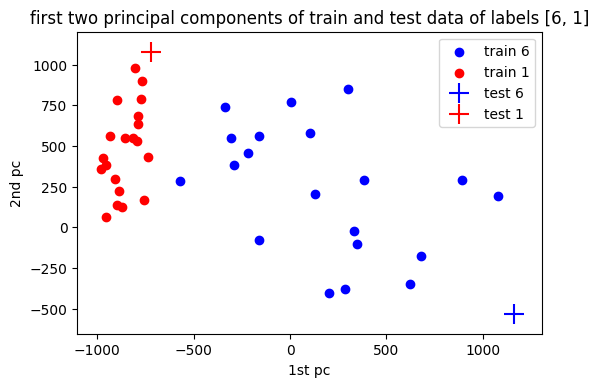

In [32]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction ---------------------------------------
pca = PCA(n_components=2)

pc_train = pca.fit_transform(train_data)
print('pc_train:', pc_train.shape)

pc_test = pca.transform(test_data)
print('pc_test:', pc_test.shape)

# Choose and extract classes to visualize -------------------------------------
vis_labels = [6,1]

vis_train_l1 = pc_train[train_labels == vis_labels[0]]
vis_train_l2 = pc_train[train_labels == vis_labels[1]]

vis_test_l1 = pc_test[test_labels == vis_labels[0]]
vis_test_l2 = pc_test[test_labels == vis_labels[1]]

# Visualization ---------------------------------------------------------------
fig = plt.figure(dpi=100)

# Visualize train samples --------------------
plt.scatter(vis_train_l1[:,0], vis_train_l1[:,1], c='b', label='train ' + str(vis_labels[0]))
plt.scatter(vis_train_l2[:,0], vis_train_l2[:,1], c='r', label='train ' + str(vis_labels[1])) 

# Visualize test samples ---------------------
plt.scatter(vis_test_l1[:,0], vis_test_l1[:,1], c='b', s=200, marker='+', label='test ' + str(vis_labels[0]))
plt.scatter(vis_test_l2[:,0], vis_test_l2[:,1], c='r', s=200, marker='+', label='test ' + str(vis_labels[1])) 

plt.legend()
plt.xlabel('1st pc')
plt.ylabel('2nd pc')
plt.title('first two principal components of train and test data of labels ' + str(vis_labels))